Note: you may need to restart the kernel to use updated packages.


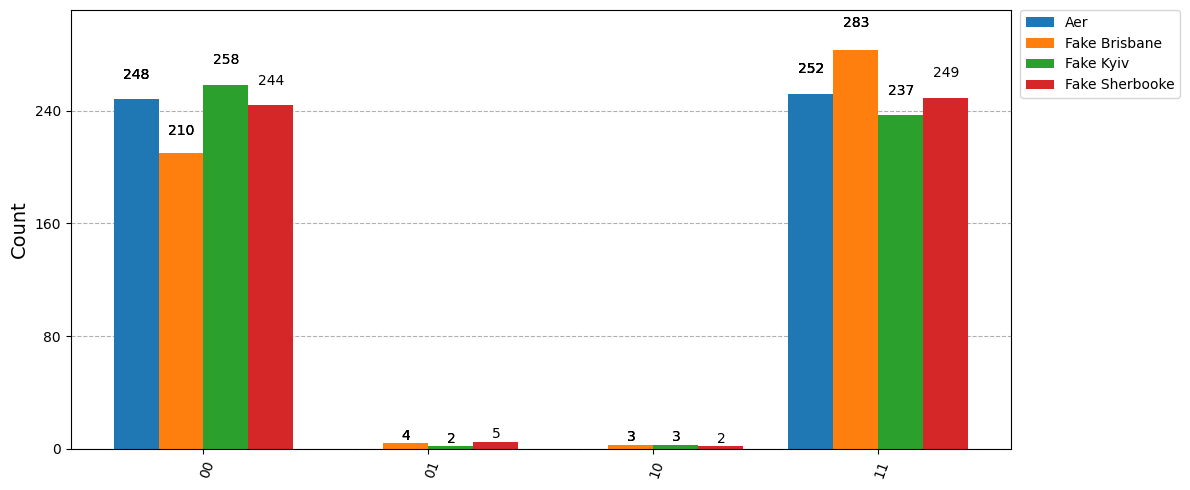

In [6]:
%pip install qiskit-aer qiskit-ibm-runtime --quiet

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime.fake_provider import FakeBrisbane, FakeKyiv, FakeSherbrooke

# Create the Bell circuit
bell = QuantumCircuit(2)
bell.h(0)
bell.cx(0, 1)
bell.measure_all()

# Run on ideal Aer simulator
aer_sim = AerSimulator()
bell_transpiled = transpile(bell, backend=aer_sim)
shots = 500
aer_result = aer_sim.run(bell_transpiled, shots=shots).result()
aer_dist = aer_result.get_counts()

# Run on noisy fake backends
fake_brisbane = FakeBrisbane()
fake_kyiv = FakeKyiv()
fake_sherbrooke = FakeSherbrooke()

# Transpile for noisy simulators
bell_brisbane = transpile(bell, backend=fake_brisbane)
bell_kyiv = transpile(bell, backend=fake_kyiv)
bell_sherbrooke = transpile(bell, backend=fake_sherbrooke)

# Create Aer simulators with noise
sim_brisbane = AerSimulator.from_backend(fake_brisbane)
sim_kyiv = AerSimulator.from_backend(fake_kyiv)
sim_sherbrooke = AerSimulator.from_backend(fake_sherbrooke)

# Run noisy simulations
result_brisbane = sim_brisbane.run(bell_brisbane, shots=shots).result()
result_kyiv = sim_kyiv.run(bell_kyiv, shots=shots).result()
result_sherbrooke = sim_sherbrooke.run(bell_sherbrooke, shots=shots).result()

# Get noisy counts
fake_brisbane_dist = result_brisbane.get_counts()
fake_kyiv_dist = result_kyiv.get_counts()
fake_sherbrooke_dist = result_sherbrooke.get_counts()

# Plot all results
plot_histogram([aer_dist, fake_brisbane_dist, fake_kyiv_dist, fake_sherbrooke_dist], 
               legend=['Aer','Fake Brisbane', 'Fake Kyiv', 'Fake Sherbooke'], 
               figsize=(12,5))
